In [1]:
import newspaper
import re
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from os import path, getcwd, listdir
from PIL import Image
from newspaper import Article

In [2]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [3]:
# search patterns
search_patterns = 'business|economy|economic'

# final data frame for analysis
final_df = pd.DataFrame()

#new searched articles
new_articles_df = pd.DataFrame()

# all cnn articles
cnn_news_paper = newspaper.build('https://edition.cnn.com', language='en', memoize_articles=False, request_timeout=10, fetch_images=False, number_threads=10)

# all foxnews articles
foxnews_paper = newspaper.build('https://www.foxnews.com', language='en', memoize_articles=False, request_timeout=10, fetch_images=False, number_threads=10)

# all bbc articles 
bbc_paper = newspaper.build('https://www.bbc.com', language='en', memoize_articles=False, request_timeout=10, fetch_images=False, number_threads=10)

# all nytimes articles
nytimes_paper = newspaper.build('https://www.nytimes.com', language='en', memoize_articles=False, request_timeout=10, fetch_images=False, number_threads=10)

papers = [cnn_news_paper, foxnews_paper, bbc_paper, nytimes_paper]

In [4]:
# create data frame from one article
def create_df_from_article(article: Article):

    # create DataFrame from parced article
    data_frame = pd.DataFrame(columns=['Authors', 'Title', 'Text', 'published_date', 'Url'])
    data_frame['Authors'] = article.authors
    data_frame['Title'] = article.title
    data_frame['Text'] = article.text
    data_frame['published_date'] = date.today().strftime("%Y-%m-%d") if article.publish_date is None else article.publish_date.strftime('%Y-%m-%d')
    data_frame['Url'] = article.url
    return data_frame


def is_article_valid_and_match_pattern(article: Article):
    # download and parse article
    article.download()
    article.parse()
    return re.search(search_patterns, str(article.title) + str(article.text) + str(article.url))


def print_progress(index, total_size):
    if index % 50 == 0:
        print("   Downloading/Parsing progress... Parsed {} pages of {}.".format(index, total_size))

def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

In [5]:
# add all business and economy articles from all papers into one new_articles_df data frame
found_articles = 0
for paper in papers:
    print("Downloading/Parsing articles from {}.".format(paper.url))
    for index, article in enumerate(paper.articles):
        print_progress(index, len(paper.articles))
        try:
            if  paper.url in article.url and is_article_valid_and_match_pattern(article):
                new_articles_df = new_articles_df.append(create_df_from_article(article), ignore_index=True)
                found_articles += 1
        except Exception:
            continue
    print("All {} articles are {}, which are about business {}\n".format(paper.url, len(paper.articles), found_articles))
    found_articles = 0

Downloading/Parsing articles from https://edition.cnn.com.
   Downloading/Parsing progress... Parsed 0 pages of 851.
   Downloading/Parsing progress... Parsed 50 pages of 851.
   Downloading/Parsing progress... Parsed 100 pages of 851.
   Downloading/Parsing progress... Parsed 150 pages of 851.
   Downloading/Parsing progress... Parsed 200 pages of 851.
   Downloading/Parsing progress... Parsed 250 pages of 851.
   Downloading/Parsing progress... Parsed 300 pages of 851.
   Downloading/Parsing progress... Parsed 350 pages of 851.
   Downloading/Parsing progress... Parsed 400 pages of 851.
   Downloading/Parsing progress... Parsed 450 pages of 851.
   Downloading/Parsing progress... Parsed 500 pages of 851.
   Downloading/Parsing progress... Parsed 550 pages of 851.
   Downloading/Parsing progress... Parsed 600 pages of 851.
   Downloading/Parsing progress... Parsed 650 pages of 851.
   Downloading/Parsing progress... Parsed 700 pages of 851.
   Downloading/Parsing progress... Parsed 75

In [6]:
# Save unique articles to today.csv file. If file exists, then update it with new articles. CSV file has no duplicates. 
# Duplicate articles are removed by article title.
today_articles_file = date.today().strftime("%d-%b-%Y") + '.csv'
if path.isfile(today_articles_file):
    csv_df = pd.read_csv(today_articles_file)
    merged_df = pd.concat([csv_df, new_articles_df]) 
    merged_df.drop_duplicates(keep='first', subset=['Title'], inplace=True)
    print("{} Articles before update, and after update {}".format(len(csv_df.index), len(merged_df.index)))
    merged_df.to_csv(today_articles_file, index=False)
else:
    new_articles_df.drop_duplicates(keep='first', subset=['Title'], inplace=True)
    new_articles_df.to_csv(today_articles_file, index=False, encoding='utf8')
    print("{} articles saved into {} file".format(len(new_articles_df.index), today_articles_file))

181 Articles before update, and after update 191


In [7]:
# Read all articles from CSV files and write into final_df data frame. Remove duplicates if loaded again.
for filename in find_csv_filenames("."):
    csv_df = pd.read_csv(filename)
    print(" Read {} articles from {}: ".format(len(csv_df.index), filename))
    final_df = pd.concat([csv_df, final_df], sort=True) 
final_df.drop_duplicates(keep='first', subset=['Title'], inplace=True)
print("Total unique articles are {} ".format(len(final_df.index)))

 Read 194 articles from 12-Jul-2020.csv: 
 Read 191 articles from 14-Jul-2020.csv: 
 Read 154 articles from 11-Jul-2020.csv: 
Total unique articles are 320 


In [8]:
final_df

,Authors,Text,Title,Url,published_date
0,Louis Casiano,"A group of Norman, Okla., residents have launc...",Oklahoma pro-police group launches petition to...,https://www.foxnews.com/us/oklahoma-pro-police...,2020-07-10
1,Joshua Nelson,Goya Foods President and CEO Bob Unanue said o...,Goya Foods CEO won't apologize in face of boyc...,https://www.foxnews.com/media/goya-boycott-tru...,2020-07-10
2,Brie Stimson,Sports leagues and players have turned racial ...,Charles Barkley says sports becoming woke 'cir...,https://www.foxnews.com/sports/charles-barkley...,2020-07-10
3,Dom Calicchio,"Lyda Krewson, the embattled mayor of St. Louis...","St. Louis mayor won’t quit, office says, after...",https://www.foxnews.com/politics/st-louis-mayo...,2020-07-10
4,Victor Garcia,Trump 2020 campaign national press secretary H...,Trump 2020 spokesman says Roger Stone commutat...,https://www.foxnews.com/media/trump-2020-campa...,2020-07-10
...,...,...,...,...,...
185,Ashitha Nagesh,Image copyright Reuters Image caption Less tha...,This police-free protest zone was dismantled -...,https://www.bbc.com/news/world-us-canada-53218448,2020-07-12
188,Sopan Deb,It is unclear whether the W.N.B.A. will sancti...,A W.N.B.A. Owner Clashes With Players on Protests,https://www.nytimes.com/2020/07/09/sports/bask...,2020-07-09
189,Conrad De Aenlle,Consider this opportunity: You can invest in a...,Stocks Generate Big Gains and Bigger Questions,https://www.nytimes.com/2020/07/10/business/st...,2020-07-10
191,Jordan Salama,It’s been deeply comforting to think that what...,Opinion | You Should Start Writing Letters,https://www.nytimes.com/2020/07/12/opinion/let...,2020-07-12


In [9]:
#  create vocabulary of all the words in the articles by using CountVectorizer
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
vocabulary_matrix = count_vectorizer.fit_transform(final_df['Text'].values.astype('U'))

In [10]:
# use LDA to create topics and probability distribution for each word in vocabulary for each topic
LDA_topic = LatentDirichletAllocation(n_components=10, random_state=42)
LDA_topic.fit(vocabulary_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [11]:
# print 10 random words from vocabulary

for i in range(10):
    random_id = random.randint(0,len(count_vectorizer.get_feature_names()))
    print(count_vectorizer.get_feature_names()[random_id])

jake
soccer
78
302
companies
bradford
anti
falls
publicly
intention


In [12]:
# print 10 words with highest probabilities for all 10 topics
for i,topic in enumerate(LDA_topic.components_):
    print(f'Top 10 words for topic #{i+1}:')
    print([count_vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #1:
['airline', 'eu', 'travel', 'hotel', 'passengers', 'airlines', 'air', 'government', 'says', 'said']


Top 10 words for topic #2:
['people', 'march', '325', '331', 'novel', 'outbreak', 'caption', 'hide', 'photos', 'coronavirus']


Top 10 words for topic #3:
['don', 'lot', 'car', 'kind', 'really', 'know', 'just', 'cars', 'people', 'like']


Top 10 words for topic #4:
['working', 'good', 've', 'contact', 'just', 'like', 'cnn', 'says', 'new', 'people']


Top 10 words for topic #5:
['series', 'white', 'like', 'tv', 'biden', 'people', 'president', 'black', 'trump', 'said']


Top 10 words for topic #6:
['state', '19', 'covid', 'health', 'pandemic', 'cases', 'coronavirus', 'new', 'people', 'said']


Top 10 words for topic #7:
['years', 'just', 'world', 'work', 'like', 'time', 'image', 'said', 'people', 'says']


Top 10 words for topic #8:
['fashion', 'time', 'year', 'world', 'says', 'people', 'women', 'black', 'new', 'said']


Top 10 words for topic #9:
['year', 'par

In [13]:
# add a column to the original data frame that will store and assign the topic to each row
# 10 topics
topic_assignment = LDA_topic.transform(vocabulary_matrix)
topic_assignment.shape

(320, 10)

In [14]:
final_df['Topic'] = topic_assignment.argmax(axis=1)
final_df.head(10)

,Authors,Text,Title,Url,published_date,Topic
0,Louis Casiano,"A group of Norman, Okla., residents have launc...",Oklahoma pro-police group launches petition to...,https://www.foxnews.com/us/oklahoma-pro-police...,2020-07-10,5
1,Joshua Nelson,Goya Foods President and CEO Bob Unanue said o...,Goya Foods CEO won't apologize in face of boyc...,https://www.foxnews.com/media/goya-boycott-tru...,2020-07-10,4
2,Brie Stimson,Sports leagues and players have turned racial ...,Charles Barkley says sports becoming woke 'cir...,https://www.foxnews.com/sports/charles-barkley...,2020-07-10,6
3,Dom Calicchio,"Lyda Krewson, the embattled mayor of St. Louis...","St. Louis mayor won’t quit, office says, after...",https://www.foxnews.com/politics/st-louis-mayo...,2020-07-10,5
4,Victor Garcia,Trump 2020 campaign national press secretary H...,Trump 2020 spokesman says Roger Stone commutat...,https://www.foxnews.com/media/trump-2020-campa...,2020-07-10,5
5,Nick Givas,A surge of coronavirus cases in Florida has ma...,"In Florida, over 40 hospitals max out ICU capa...",https://www.foxnews.com/us/florida-hospitals-m...,2020-07-10,5
6,Adam Shaw,"President Trump on Friday, in a roundtable mee...",Trump declares Democrats ‘party of socialism a...,https://www.foxnews.com/politics/trump-dems-pa...,2020-07-10,4
7,Victor Garcia,White House chief economic adviser Larry Kudlo...,Kudlow lays out 'four things every citizen sho...,https://www.foxnews.com/media/larry-kudlow-fou...,2020-07-10,5
8,Charles Creitz,Somalia-born human rights activist Ayaan Hirsi...,Ayaan Hirsi Ali blasts Ilhan Omar over call to...,https://www.foxnews.com/media/ayaan-hirsi-ali-...,2020-07-10,9
9,Joshua Nelson,A New York City store owner is suing Gov. Andr...,NYC store owner suing Gov. Cuomo over looting ...,https://www.foxnews.com/media/nyc-store-owner-...,2020-07-10,5


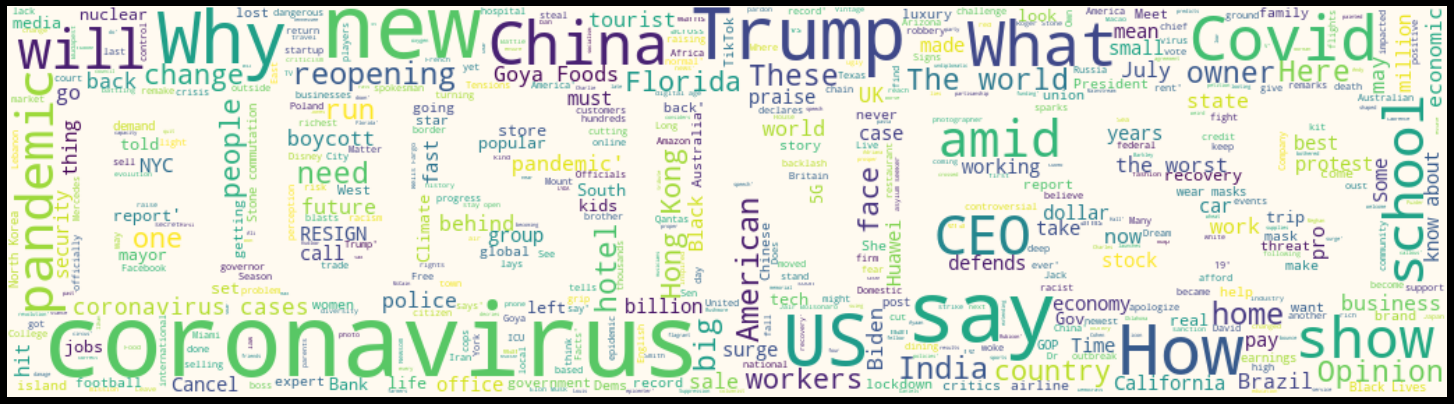

In [15]:
# Word cloud from articles titles
mask = np.array(Image.open(path.join(getcwd(), "business_mask.png")))
wc = WordCloud(width=1200, height=600,background_color="floralwhite", max_words=500, mask=mask, max_font_size=90, random_state=42)
wc.generate(str(final_df['Title'].values))

# create coloring from image
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()